In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.linear_model import LogisticRegression
plt.style.use('ggplot')
%matplotlib inline

# Linear Models in Classification
<h1><p style="text-align: center;">$\hat{\mathbf{y}} = f(\mathbf{xw}) + b$ </p></h1>
## Where:
<h2><p style="text-align: center;">$\mathbf{x}$ = vector containing input features</p></h2>
<h2><p style="text-align: center;">$\mathbf{w}$ = vector of weights (or coefficients)</p></h2>
<h2><p style="text-align: center;">$b$ = bias</p></h2>
<h2><p style="text-align: center;">$f$ is some thresholding function</p></h2>

## Typically:
<h2><p style="text-align: center;">$
    f(x)= 
\begin{cases}
    1,& \text{if } x > 0\\
    0,              & x \leq 0
\end{cases}
$</p></h2>

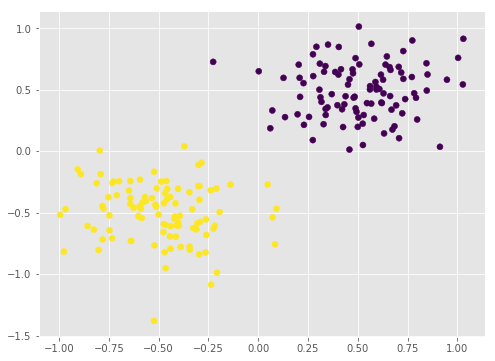

In [2]:
X, y = utils.make_classification()
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)

/home/jaidevd/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


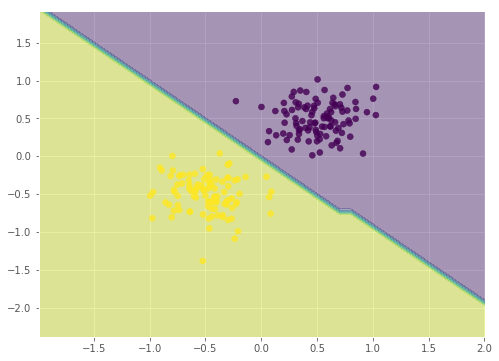

In [7]:
lr = LogisticRegression()
lr.fit(X, y)
plt.figure(figsize=(8, 6))
utils.draw_decision_boundary(lr, X, y)

# Exercise: Try fitting the logistic regression model on the following dataset and plot the decision boundary

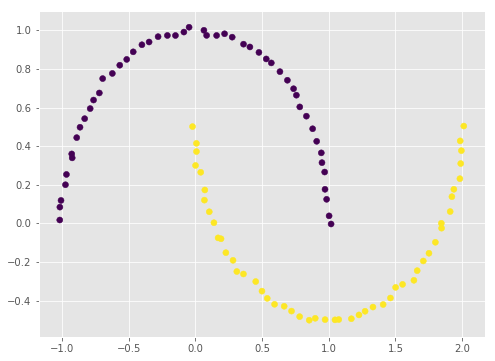

In [11]:
X, y = utils.make_moons(noise=0.01)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [19]:
# enter code here

# Question: What went wrong?

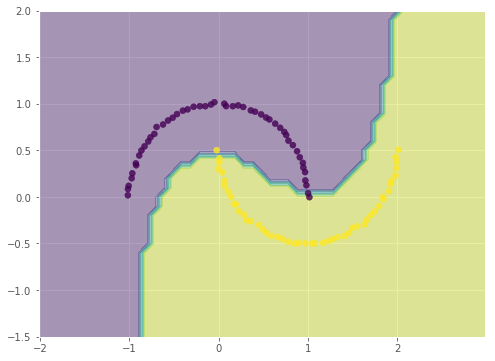

In [14]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X, y)
utils.draw_decision_boundary(svc, X, y)

# Exercise: Try to fit a SVC to the following dataset and plot the decision boundary

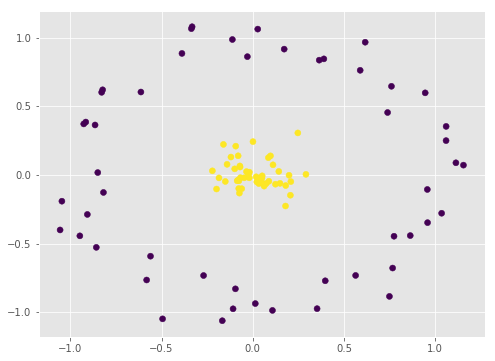

In [22]:
X, y = utils.make_circles(factor=0.1, noise=0.1)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [23]:
# enter code here

# Linear Models in Regression